In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
City_Data = pd.read_csv(city_data_to_load)
Ride_Data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
Combined_Data = pd.merge(Ride_Data, City_Data, left_on='city', right_on = 'city', how='left', sort=False )
Combined_DF = pd.DataFrame(Combined_Data)

# Displaying the data table for preview below

##preping data that is going to be used later in the work##

#Grouping by City to get city total
Grouped_City_DF = Combined_DF.groupby('city')

#City Data Frame
# Average Fare
# Number of Rides
City_Grouped = Grouped_City_DF.agg({
    'fare' : 'mean',
    'ride_id' : 'count'})
City_Clean_DF = pd.merge(City_Grouped, City_Data, on='city')
City_Clean_DF = City_Clean_DF.rename(columns={
    'city' : 'City',
    'fare' : 'Fare',
    'ride_id':'Rides',
    'driver_count':'Drivers',
    'type':'Type'})

#grouping to be used for the firsst scatter plot

#Creating a datafram for urban related data only
Urban_Clean=City_Clean_DF.loc[City_Clean_DF['Type']=='Urban']


#Creating a dataframe for suburban related data only
Suburban_Clean = City_Clean_DF.loc[City_Clean_DF['Type']=='Suburban']

#Creating a dataframe for rural related data only
Rural_Clean = City_Clean_DF.loc[City_Clean_DF['Type']=='Rural']


# Display the data table for preview
Combined_DF.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12,46,Urban


## Bubble Plot of Ride Sharing Data

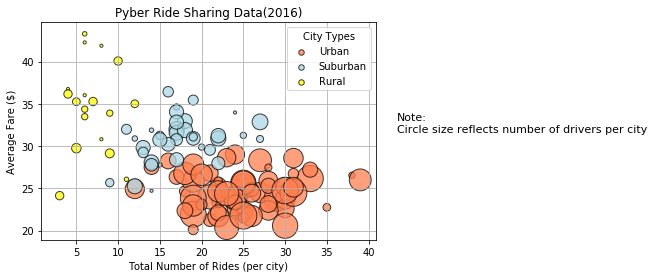

In [2]:
#building plot#

#capturing x/y coordinates for each city type

#x/y coordinates for urban
UrbanX_Axis = Urban_Clean['Rides']
UrbanY_Axis = Urban_Clean['Fare']
Urban_Size = (Urban_Clean['Drivers']*10)

#x/y coordinates for suburban
SubX_Axis = Suburban_Clean['Rides']
SubY_Axis = Suburban_Clean['Fare']
Sub_Size = (Suburban_Clean['Drivers']*10)

#x/y coordinates for rural
RurX_Axis = Rural_Clean['Rides']
RurY_Axis = Rural_Clean['Fare']
Rur_Size = (Rural_Clean['Drivers']*10)

#building the scatter plots for each city type

#urban scater polot
Urban_Scatter = plt.scatter(UrbanX_Axis, UrbanY_Axis, marker = "o", s=Urban_Size, facecolors = "coral", edgecolors="black", label='Urban', alpha=0.75)

#subrban scatter plot
Sub_Scatter = plt.scatter(SubX_Axis, SubY_Axis, marker = "o", s = Sub_Size, facecolors = "lightblue", edgecolors="black", label='Suburban', alpha=0.75)

#rural scatter plot
Rur_Scatter = plt.scatter(RurX_Axis, RurY_Axis, marker = "o", s = Rur_Size, facecolors = "yellow", edgecolors="black", label='Rural', alpha=0.75)

#labelling the axis
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel ('Average Fare ($)')

#adding gridlines
plt.grid()

# Incorporating title and 
#plt.title=(" A ")
#plt.title=(" B ")
#plt.title=(" C ")
plt.title("Pyber Ride Sharing Data(2016)")



# Creating the legend 

lgnd = plt.legend(title = 'City Types')
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]

# Incorporate a text label regarding circle size

txt="Note:\nCircle size reflects number of drivers per city"
plt.figtext(0.95, 0.5, txt, wrap=True, horizontalalignment='left', fontsize=11)

# Save Figure
plt.savefig('Pyber_Ride_Sharing_Scatter.png', bbox_inches='tight')

plt.show()


## Total Fares by City Type

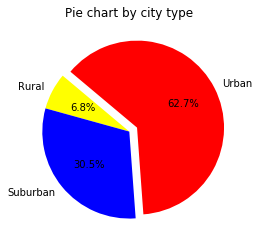

<Figure size 432x288 with 0 Axes>

In [3]:
#calculating total fares by city type.

#Grouping fares by type and sum
Fare_Total_byType = Combined_DF.groupby('type')
Fare_Totals = Fare_Total_byType['fare'].sum()

#breaking total fare into series DF with index
Fare_TotalDF = pd.DataFrame({'type':Fare_Totals.index, 'fares':Fare_Totals.values})

# Build Pie Chart
labels = Fare_TotalDF['type']
colors = ['yellow', 'blue', 'red']
sizes = Fare_TotalDF['fares']
explode = (0, 0, 0.1)
plt.pie(sizes, labels=labels, colors=colors, startangle=140, explode = explode, autopct = "%1.1f%%")
plt.title('Pie chart by city type')
plt.show()

# Save Figure
plt.savefig('Total_Fare_By_City_Pie.png')

## Total Rides by City Type

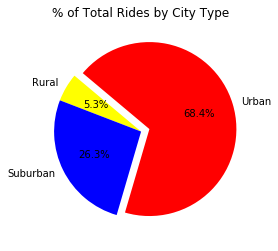

<Figure size 432x288 with 0 Axes>

In [4]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure



## Total Rides by City Type ########################

#Groupby to identify types and ride totals per type
Rides_Total_byType = Combined_DF.groupby('type')
Rides_Totals = Rides_Total_byType['ride_id'].count()

#Convert series into DF with an index
Rides_TotalDF = pd.DataFrame({'type':Rides_Totals.index, 'Rides':Rides_Totals.values})

# Build Pie Chart
labels = Rides_TotalDF['type']
colors = ['yellow', 'blue', 'red']
sizes = Rides_TotalDF['Rides']
explode = (0, 0, 0.1)
plt.pie(sizes, labels=labels, colors=colors, startangle=140, explode = explode, autopct = "%1.1f%%")
plt.title("% of Total Rides by City Type")
plt.show()
# Save Figure
plt.savefig('Total_Rides_By_City_Pie.png')


In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

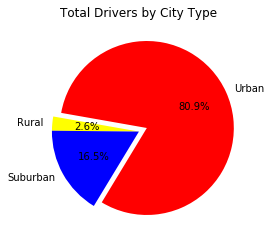

<Figure size 432x288 with 0 Axes>

In [7]:
# Total Drivers by City Type 

#Grouping to city types and drivers totals per type
Drivers_Total_byType = City_Clean_DF.groupby('Type')
Drivers_Totals = Drivers_Total_byType['Drivers'].sum()

#Converting the series into DF with an index
Drivers_TotalDF = pd.DataFrame({'type':Drivers_Totals.index, 'Drivers':Drivers_Totals.values})

# Building a Pie Charts
labels = Drivers_TotalDF['type']
colors = ['yellow', 'blue', 'red']
sizes = Drivers_TotalDF['Drivers']
explode = (0, 0, 0.1)
plt.pie(sizes, labels=labels, colors=colors, startangle=170, explode = explode, autopct = "%1.1f%%")


plt.title('Total Drivers by City Type')
plt.show()


# Save Figure
plt.savefig('Total_Drivers_By_City_Type_Pie.png')


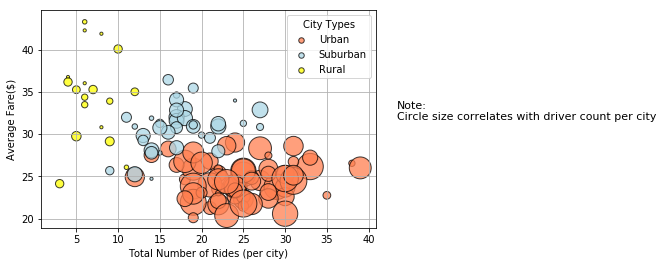

In [8]:
#Bubble Plot 
# Obtaining the x and y coordinates for each city type
UrbanX_Axis = Urban_Clean['Rides']
UrbanY_Axis = Urban_Clean['Fare']
Urban_Size = (Urban_Clean['Drivers']*10)

SubX_Axis = Suburban_Clean['Rides']
SubY_Axis = Suburban_Clean['Fare']
Sub_Size = (Suburban_Clean['Drivers']*10)

RurX_Axis = Rural_Clean['Rides']
RurY_Axis = Rural_Clean['Fare']
Rur_Size = (Rural_Clean['Drivers']*10)

# Building scatter plots for each city type
plt.figure()

plt.scatter(UrbanX_Axis, UrbanY_Axis, marker = "o", s=Urban_Size, facecolors = "coral", edgecolors="black", label='Urban', alpha=0.75)
plt.scatter(SubX_Axis, SubY_Axis, marker = "o", s = Sub_Size, facecolors = "lightblue", edgecolors="black", label='Suburban', alpha=0.75)
plt.scatter(RurX_Axis, RurY_Axis, marker = "o", s = Rur_Size, facecolors = "yellow", edgecolors="black", label='Rural', alpha=0.75)

# Including other properties for the graph
# plt.xlim(0,42)
# plt.ylim(10,50)
plt.title=('Pyber Ride Sharing Data(2016)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel ('Average Fare($)')
plt.grid()

# Creating a legend

lgnd = plt.legend(title = 'City Types')
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]

# Creating a text explaining the size of bubbles

txt="Note:\nCircle size correlates with driver count per city"
plt.figtext(0.95, 0.5, txt, wrap=True, horizontalalignment='left', fontsize=11)

# Save Figure



plt.show()

In [ ]:
###################################"Yessss !"#############################